In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56423_G')

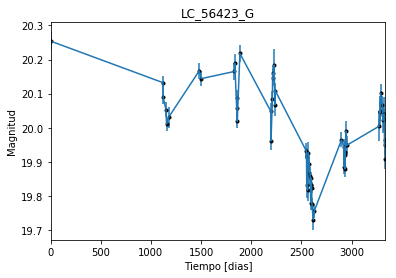

In [2]:
data = np.genfromtxt('LC_56423_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56423_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

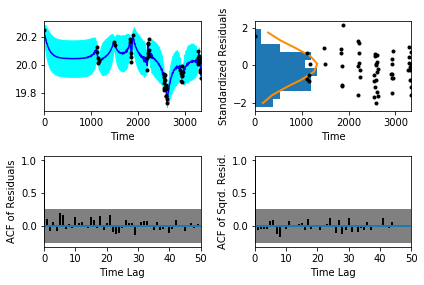

In [5]:
sample.assess_fit()

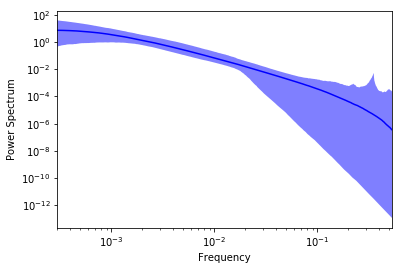

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56423_G')

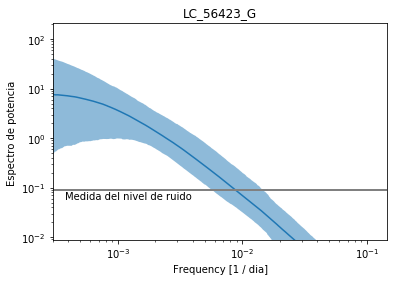

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56423_G')

Text(0.5,1,'Prediccion , valor esperado LC_56423_G')

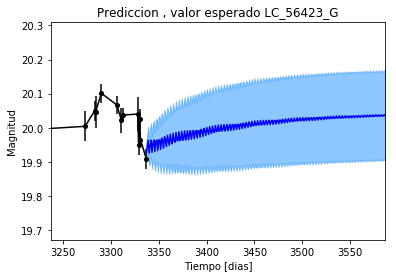

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56423_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56423_G')

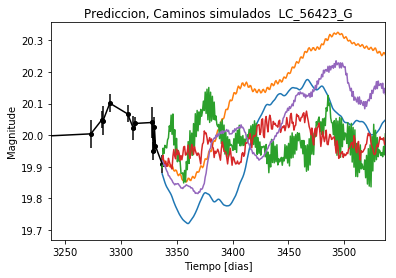

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56423_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56423_G')

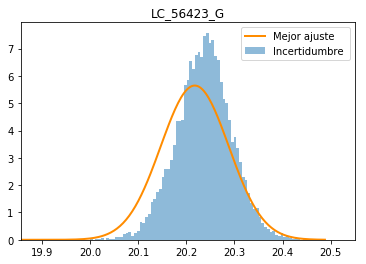

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56423_G')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_G')

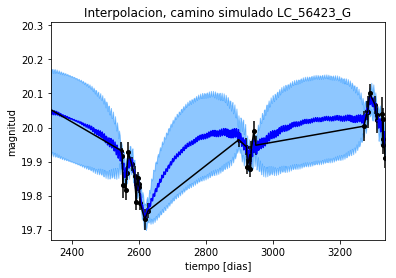

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_G')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_G')

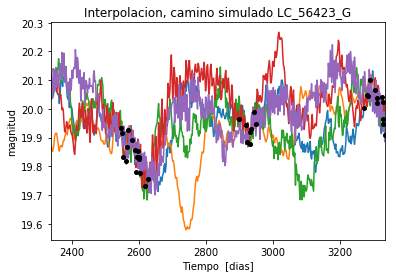

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 585.010243276
Median: 0.0229765916663
Standard deviation: 0.201641297044
68% credibility interval: [ 0.00233519  0.23238227]
95% credibility interval: [  5.04563750e-04   7.80780363e-01]
99% credibility interval: [  3.38241260e-04   9.64592479e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 642.784057081
Median: 0.0136391863021
Standard deviation: 0.129207493298
68% credibility interval: [ 0.00124722  0.09963293]
95% credibility interval: [  3.97675558e-04   4.74208389e-01]
99% credibility interval: [  3.16293693e-04   8.60123164e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 924.798560199
Median: 0.130380039255
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 937.631565687
Median: 104.824869053
Standard deviation: 1.91243982129
68% credibility interval: [ 102.87327595  106.31411905]
95% credibility interval: [ 100.18576553  108.28834017]
99% credibility interval: [  98.10411271  109.14563838]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 773.241613159
Median: 1.70566809607
Standard deviation: 2.61510629011
68% credibility interval: [ 0.35842537  5.3971206 ]
95% credibility interval: [ 0.09229671  9.37898226]
99% credibility interval: [  0.02993849  12.35364233]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 604.66861661
Median: 5.25578521094
Standard deviation: 12.9131077889
68% credibility interval: [  0.57293068  21.81910893]
95% credibility interval: [  2.36994563e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1696.78360924
Median: 3.97337593902e-52
Standard deviation: 2.23510009689e+111
68% credibility interval: [  1.11665536e-104   4.45352157e-004]
95% credibility interval: [  8.37514752e-185   1.32745404e+102]
99% credibility interval: [  8.94995789e-191   1.23949643e+108]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3762.42776932
Median: 20.0571291537
Standard deviation: 0.072686647354
68% credibility interval: [ 19.99922251  20.12016729]
95% credibility interval: [ 19.91621762  20.21022604]
99% credibility interval: [ 19.79504503  20.2789215 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 586.815514219
Median: 0.287487953187
Standard deviation: 0.299105846784
68% credibility interval: [ 0.01018946  0.67433583]
95% credibility interval: [ 0.          0.98358138]
99% credibility interval: [ 0.          1.04105519]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 586.815514219
Median: 0.287487953187
Standard deviation: 0.299105846784
68% credibility interval: [ 0.01018946  0.67433583]
95% credibility interval: [ 0.          0.98358138]
99% credibility interval: [ 0.          1.04105519]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1645.31116696
Median: 0.0
Standard deviation: 0.0005429664155
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 937.631565687
Median: 104.824869053
Standard deviation: 1.91243982129
68% credibility interval: [ 102.87327595  106.31411905]
95% credibility interval: [ 100.18576553  108.28834017]
99% credibility interval: [  98.10411271  109.14563838]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 564.784155334
Median: 0.0248478367928
Standard deviation: 0.0188624491119
68% credibility interval: [ 0.01546535  0.0437808 ]
95% credibility interval: [ 0.01051045  0.08082251]
99% credibility interval: [ 0.00840638  0.12382048]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1381.17263515
Median: 1.16310457751
Standard deviation: 0.238136262169
68% credibility interval: [ 0.94303899  1.41912781]
95% credibility interval: [ 0.77294181  1.71010178]
99% credibility interval: [ 0.68267451  1.87270274]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 624.523574189
Median: 0.03994180854
Standard deviation: 0.458756133585
68% credibility interval: [  2.07848508e-04   3.77558044e-01]
95% credibility interval: [  1.68126680e-103   1.64229561e+000]
99% credibility interval: [  8.28474247e-111   2.89555585e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 585.010243276
Median: (-0.144366183167-2.55182139533j)
Standard deviation: 2.26651068225
68% credibility interval: [-1.46010089-4.38409242j -0.01467244-6.29451191j]
95% credibility interval: [ -4.90578770e+00-5.54488707j  -3.17026754e-03-5.64754097j]
99% credibility interval: [ -6.06071329e+00+0.j          -2.12523252e-03-0.09220728j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 642.784057081
Median: (-0.0856975349752+0.814496136142j)
Standard deviation: 2.04718947614
68% credibility interval: [-0.62601214+1.10878476j -0.00783649+0.j        ]
95% credibility interval: [ -2.97953918e+00+1.76848265j  -2.49866922e-03+0.j        ]
99% credibility interval: [ -5.40431323e+00+1.49479968j  -1.98733189e-03+0.09315093j]
Post